In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

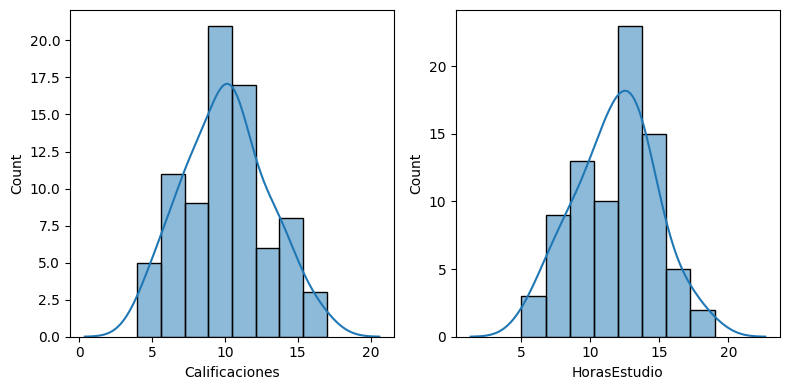

In [2]:
df_calf = pd.read_csv('calificaciones_positivas.csv', index_col='Estudiante')
df_hrs = pd.read_csv('HorasEstudio.csv', index_col='Estudiante')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
sns.histplot(df_calf['Calificaciones'], ax=ax1, kde=True, kde_kws=dict(cut=3))
sns.histplot(df_hrs['HorasEstudio'], ax=ax2, kde=True, kde_kws=dict(cut=3))
plt.tight_layout()

## **Población de 80 estudiantes**

In [3]:
df = df_calf.join(df_hrs)
df.describe().round(2)

,Calificaciones,HorasEstudio
count,80.00,80.00
mean,10.06,11.80
std,2.89,2.94
min,4.00,5.00
25%,8.00,10.00
50%,10.00,12.00
75%,12.00,14.00
max,17.00,19.00


## **Tamaño de Muestra**

Nivel de Confianza de 95% equivale a 1.96

In [4]:
z = 1.96
p = .05
e = .05

n = ((z**2) * p * (1 - p)) / (e**2)
n


72.99039999999998

Para poblaciones **Finitas** en nuestro caso es `N = 80`

In [5]:
N = 80
n_ajustado = (n) / (1 + (n - 1)/ N)
print(f"n_ajustado: {n_ajustado:.2f}")
tamano_muestra = round(n_ajustado)
print(f"Con un nivel de confianza de 95% y margen de error del {e*100}%, el tamaño de la muestra es {tamano_muestra}")

n_ajustado: 38.42
Con un nivel de confianza de 95% y margen de error del 5.0%, el tamaño de la muestra es 38


## **Muestra mediante muestreo aleatorio simple**

In [29]:
import random
random.seed(23)
poblacion = list(range(1, 81))  # Población del 1 al 80
# tamano_muestra = 38

# Selecciona la muestra aleatoria simple
muestra = random.sample(poblacion, tamano_muestra)

print("Los estudiantes seleccionados son:", muestra)


Los estudiantes seleccionados son: [38, 11, 3, 76, 40, 55, 49, 68, 46, 17, 25, 35, 57, 2, 29, 59, 4, 7, 6, 72, 32, 27, 67, 33, 41, 47, 28, 23, 50, 64, 14, 78, 80, 24, 43, 12, 77, 52]


In [30]:
df_muestra = df.loc[df.index.intersection(muestra)]
df_muestra

,Calificaciones,HorasEstudio
Estudiante,,
2,12,15
3,13,14
4,9,16
6,10,17
7,10,19
11,11,11
12,8,8
14,10,16
17,15,14


<Axes: ylabel='Count'>

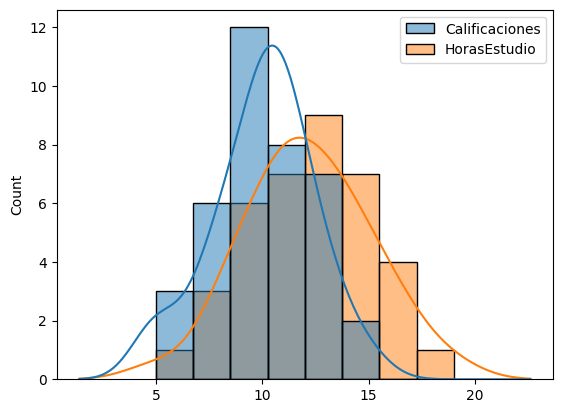

In [47]:
sns.histplot(df_muestra, kde=True, kde_kws=dict(cut=3))

## **Intervalo de Confianza para la *Media muestral***

In [11]:
import statsmodels.api as sm

In [33]:
df_muestra.describe()

,Calificaciones,HorasEstudio
count,38.000000,38.000000
mean,10.026316,12.157895
std,2.353684,2.945691
min,5.000000,5.000000
25%,9.000000,10.250000
50%,10.000000,12.000000
75%,11.000000,14.000000
max,15.000000,19.000000


In [41]:
n = len(df_muestra)
mean_sample_calif = df_muestra['Calificaciones'].mean()
std_sample_calif = df_muestra['Calificaciones'].std()
se_sample_calif = std_sample_calif / np.sqrt(n)

lcb = mean_sample_calif - z * se_sample_calif
ucb = mean_sample_calif + z * se_sample_calif
print(f"Tamaño de la muestra: {n}")
print(f"Media: {mean_sample_calif:.2f}")
print(f"Desviación Estandar: {std_sample_calif:.2f}")
print(f"Error Estandar: {se_sample_calif:.2f}")
print(f"Con un 95% de confianza decimos que la media de la muestra de calificaciones esta entre {lcb:.2f} y {ucb:.2f}")

Tamaño de la muestra: 38
Media: 10.03
Desviación Estandar: 2.35
Error Estandar: 0.38
Con un 95% de confianza decimos que la media de la muestra de calificaciones esta entre 9.28 y 10.77


---

In [42]:
se_sample_calif = std_sample_calif / np.sqrt(n)
se_sample_calif

np.float64(0.38181799546060935)

In [43]:
sm.stats.DescrStatsW(df_muestra['Calificaciones']).zconfint_mean()


(np.float64(9.277966269721613), np.float64(10.774665309225757))